# Group Assignment 2 - Census Data Exploration
Author: Claire Guo 

Description: Analysis and Visualization of Race in the United States by state based off 2019 US Census Data. The data in this exploration is useful in visualizing the diverse race patterns within the US and understanding more about what kinds of people make up the US population. First, I begin by analyzing and understanding the components within the imported dataset and then creating a series of charts and maps to better visualize national race population patterns.

## Importing Libraries 

In this section, I import all of the necessary libraries I need to use to view, analyze, and visualize the data.

In [1]:
import pandas as pd

Importing `pandas` library for general data wrangling tasks

In [2]:
import geopandas as gpd

Importing `geopandas` library to read and visualize spatial data

In [3]:
import contextily as ctx

Importing `contextily` library to provide basemaps for data visualization

In [4]:
import matplotlib.pyplot as plt

Importing `matplotlib.pyplot` library to give more power to data plots

## Importing Census Data by State

In [5]:
gdf_state = gpd.read_file('acs2019_1yr_B03002_04000US46.geojson')

Using the `read_file()` function to load in the .geojson file by noting the file path.

## Preliminary Analysis of the Data

In this section, I view the data and gain a general understanding of what is in the data I imported.

In [6]:
gdf_state.shape

(52, 45)

Using the `shape()` function to look at the size of the data. The output shows (# of rows, # of columns). From this I understand there are 45 variables measured for 51 states (including District of Columbia) in the United States. One of the rows belongs to the United States as a whole. This will be deleted later.

In [7]:
gdf_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             52 non-null     object  
 1   name              52 non-null     object  
 2   B03002001         52 non-null     float64 
 3   B03002001, Error  52 non-null     float64 
 4   B03002002         52 non-null     float64 
 5   B03002002, Error  52 non-null     float64 
 6   B03002003         52 non-null     float64 
 7   B03002003, Error  52 non-null     float64 
 8   B03002004         52 non-null     float64 
 9   B03002004, Error  52 non-null     float64 
 10  B03002005         52 non-null     float64 
 11  B03002005, Error  52 non-null     float64 
 12  B03002006         52 non-null     float64 
 13  B03002006, Error  52 non-null     float64 
 14  B03002007         52 non-null     float64 
 15  B03002007, Error  52 non-null     float64 
 16  B03002008         52

Used the `.info()` command to view the data types for each column.

In [8]:
gdf_state.head(10)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,01000US,United States,328239523.0,0.0,267757777.0,11342.0,196789401.0,22517.0,40596040.0,70047.0,...,7113.0,15513283.0,118300.0,3005564.0,54552.0,1353333.0,39431.0,1652231.0,35736.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US01,Alabama,4903185.0,0.0,4683889.0,3767.0,3192955.0,2602.0,1312821.0,7594.0,...,335.0,64828.0,6767.0,9131.0,2376.0,4013.0,1486.0,5118.0,2074.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,0.0,678997.0,110.0,437714.0,2139.0,21773.0,1790.0,...,246.0,10506.0,2917.0,6566.0,1793.0,1919.0,679.0,4647.0,1642.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,0.0,4968125.0,0.0,3929213.0,3028.0,319045.0,6230.0,...,531.0,354332.0,19597.0,108541.0,9836.0,47258.0,6933.0,61283.0,6386.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,0.0,2785853.0,2662.0,2171931.0,1252.0,464996.0,5949.0,...,232.0,72496.0,8350.0,12499.0,3068.0,6004.0,2375.0,6495.0,2257.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,0.0,23937341.0,0.0,14356081.0,6353.0,2171989.0,16630.0,...,2644.0,5317020.0,68648.0,754032.0,23128.0,369050.0,16432.0,384982.0,16920.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
6,04000US08,Colorado,5758736.0,0.0,4501833.0,0.0,3888129.0,3178.0,227812.0,6128.0,...,841.0,200176.0,13946.0,78327.0,7327.0,28581.0,3940.0,49746.0,6949.0,"MULTIPOLYGON (((-109.05095 40.22265, -109.0509..."
7,04000US09,Connecticut,3565287.0,0.0,2964333.0,0.0,2339665.0,3330.0,360830.0,6223.0,...,213.0,188734.0,13550.0,51558.0,6054.0,19852.0,4123.0,31706.0,5911.0,"MULTIPOLYGON (((-73.51808 41.66672, -73.51807 ..."
8,04000US10,Delaware,973764.0,0.0,880374.0,0.0,597001.0,2089.0,213819.0,3081.0,...,203.0,19041.0,4647.0,4648.0,1765.0,2350.0,1173.0,2298.0,1215.0,"MULTIPOLYGON (((-75.76007 39.29682, -75.76010 ..."
9,04000US11,District of Columbia,705749.0,0.0,626272.0,0.0,263153.0,609.0,311575.0,2811.0,...,148.0,28441.0,4973.0,4308.0,1567.0,1886.0,915.0,2422.0,1135.0,"MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ..."


Using the `head(10)` command, I am able to view the first 10 rows of the dataset and understand what the dataset contains.

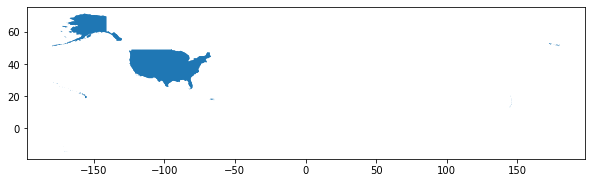

In [9]:
gdf_state.plot(figsize=(10,10))

Plotted the data to view the general map my data was looking at. The output shows a map of the United States.

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Used the `.set_option()` command to see all of the columns and rows so I don't only see the first 10 or last 10 columns and rows. The output of these commands sets the options of the next time I view the data.

In [11]:
gdf_state.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
16,04000US19,Iowa,3155070.0,0.0,2957588.0,1387.0,2684701.0,2572.0,125861.0,4524.0,9771.0,1460.0,75672.0,3122.0,1406.0,553.0,3158.0,2470.0,57019.0,5010.0,836.0,545.0,56183.0,4984.0,197482.0,1387.0,150835.0,4894.0,3474.0,1250.0,2066.0,826.0,462.0,290.0,623.0,761.0,28793.0,4447.0,11229.0,2096.0,5623.0,1521.0,5606.0,1290.0,"MULTIPOLYGON (((-96.49878 42.56104, -96.48708 ..."


Took a sample of the data to check to see if the `set.option()` command worked and if I can see all 45 columns. The output shows a random row chosen from the data set.

In [12]:
gdf_state.geoid.head()

0      01000US
1    04000US01
2    04000US02
3    04000US04
4    04000US05
Name: geoid, dtype: object

Used `.geoid.head()` command to view the FIPS codes for the first five rows. The FIPS code identifies each distinct state in the US.

## Deleting a row
In order to narrow down the data to only contain the US states, I need to delete the summary row that shows the data for the entire country

In [13]:
gdf_state.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,01000US,United States,328239523.0,0.0,267757777.0,11342.0,196789401.0,22517.0,40596040.0,70047.0,2236348.0,22027.0,18427914.0,39236.0,565473.0,15316.0,839270.0,29578.0,8303331.0,86915.0,312842.0,12007.0,7990489.0,86600.0,60481746.0,11342.0,39686000.0,101448.0,1393631.0,40440.0,610988.0,25390.0,209070.0,12022.0,63210.0,7113.0,15513283.0,118300.0,3005564.0,54552.0,1353333.0,39431.0,1652231.0,35736.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US01,Alabama,4903185.0,0.0,4683889.0,3767.0,3192955.0,2602.0,1312821.0,7594.0,19364.0,2743.0,65215.0,2368.0,1520.0,690.0,9623.0,2795.0,82391.0,6397.0,2245.0,891.0,80146.0,6381.0,219296.0,3767.0,133420.0,7917.0,6730.0,1912.0,3901.0,2284.0,914.0,728.0,372.0,335.0,64828.0,6767.0,9131.0,2376.0,4013.0,1486.0,5118.0,2074.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,0.0,678997.0,110.0,437714.0,2139.0,21773.0,1790.0,113467.0,3892.0,43322.0,2462.0,9715.0,795.0,2096.0,2042.0,50910.0,5094.0,672.0,644.0,50238.0,4990.0,52548.0,110.0,32057.0,3295.0,778.0,492.0,2077.0,684.0,356.0,323.0,208.0,246.0,10506.0,2917.0,6566.0,1793.0,1919.0,679.0,4647.0,1642.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,0.0,4968125.0,0.0,3929213.0,3028.0,319045.0,6230.0,289161.0,4369.0,235202.0,5508.0,13361.0,1436.0,10110.0,3100.0,172033.0,9205.0,5109.0,1546.0,166924.0,9138.0,2310592.0,0.0,1772597.0,19961.0,24684.0,4565.0,43112.0,6675.0,6519.0,1857.0,807.0,531.0,354332.0,19597.0,108541.0,9836.0,47258.0,6933.0,61283.0,6386.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,0.0,2785853.0,2662.0,2171931.0,1252.0,464996.0,5949.0,16216.0,2371.0,45839.0,3582.0,12673.0,1777.0,3094.0,1254.0,71104.0,6492.0,1212.0,731.0,69892.0,6278.0,231951.0,2662.0,143089.0,9057.0,2472.0,1352.0,1000.0,576.0,239.0,216.0,156.0,232.0,72496.0,8350.0,12499.0,3068.0,6004.0,2375.0,6495.0,2257.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."


Used the `head()` command to look at the first five rows of data to check where the row I want deleted is (the first row).

In [14]:
gdf_state = gdf_state.drop([0])

Used the `.drop()` command to delete the row indexed at '0' (the first row).

In [15]:
gdf_state.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,04000US01,Alabama,4903185.0,0.0,4683889.0,3767.0,3192955.0,2602.0,1312821.0,7594.0,19364.0,2743.0,65215.0,2368.0,1520.0,690.0,9623.0,2795.0,82391.0,6397.0,2245.0,891.0,80146.0,6381.0,219296.0,3767.0,133420.0,7917.0,6730.0,1912.0,3901.0,2284.0,914.0,728.0,372.0,335.0,64828.0,6767.0,9131.0,2376.0,4013.0,1486.0,5118.0,2074.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,0.0,678997.0,110.0,437714.0,2139.0,21773.0,1790.0,113467.0,3892.0,43322.0,2462.0,9715.0,795.0,2096.0,2042.0,50910.0,5094.0,672.0,644.0,50238.0,4990.0,52548.0,110.0,32057.0,3295.0,778.0,492.0,2077.0,684.0,356.0,323.0,208.0,246.0,10506.0,2917.0,6566.0,1793.0,1919.0,679.0,4647.0,1642.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,0.0,4968125.0,0.0,3929213.0,3028.0,319045.0,6230.0,289161.0,4369.0,235202.0,5508.0,13361.0,1436.0,10110.0,3100.0,172033.0,9205.0,5109.0,1546.0,166924.0,9138.0,2310592.0,0.0,1772597.0,19961.0,24684.0,4565.0,43112.0,6675.0,6519.0,1857.0,807.0,531.0,354332.0,19597.0,108541.0,9836.0,47258.0,6933.0,61283.0,6386.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,0.0,2785853.0,2662.0,2171931.0,1252.0,464996.0,5949.0,16216.0,2371.0,45839.0,3582.0,12673.0,1777.0,3094.0,1254.0,71104.0,6492.0,1212.0,731.0,69892.0,6278.0,231951.0,2662.0,143089.0,9057.0,2472.0,1352.0,1000.0,576.0,239.0,216.0,156.0,232.0,72496.0,8350.0,12499.0,3068.0,6004.0,2375.0,6495.0,2257.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,0.0,23937341.0,0.0,14356081.0,6353.0,2171989.0,16630.0,149063.0,5527.0,5786711.0,19627.0,141846.0,4748.0,107538.0,10686.0,1224113.0,26997.0,52948.0,6507.0,1171165.0,26813.0,15574882.0,0.0,9128877.0,65464.0,110155.0,9319.0,172049.0,14097.0,78724.0,7412.0,14025.0,2644.0,5317020.0,68648.0,754032.0,23128.0,369050.0,16432.0,384982.0,16920.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


Used the `.head()` command again to view the first five rows and check if the first row was properly deleted.

## Narrowing down the columns

I do not need all 45 columns to complete my data visualization. To narrow down which columns I want to keep, I refer to [metadata.json](metadata.json).


In [16]:
list(gdf_state)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

Used the `list()` command to outpit a list of the existing columns

In [17]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

After looking at the [metadata.json](metadata.json) data file, I picked the columns that I wanted to keep and listed them into a variable called `columns_to_keep`.

In [18]:
gdf_state = gdf_state[columns_to_keep]

Used brackets in order to redefine gdf_state so that it only contains the columns of data in columns_to_keep.

In [19]:
gdf_state.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,04000US01,Alabama,4903185.0,4683889.0,3192955.0,1312821.0,19364.0,65215.0,1520.0,9623.0,82391.0,219296.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,678997.0,437714.0,21773.0,113467.0,43322.0,9715.0,2096.0,50910.0,52548.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,2785853.0,2171931.0,464996.0,16216.0,45839.0,12673.0,3094.0,71104.0,231951.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


Checked that gdf_state only contains the columns I want by using the `.head()` command.

## Renaming columns

To make the columns more clear, I rename them to their corresponding desired names. This way, viewing the dataset becomes more understandable.

In [20]:
list(gdf_state)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

I started by listing out the columns in gdf_state to view what the columns are named now.

In [21]:
gdf_state.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

According to the [metadata.json](metadata.json) file, I renamed each column to its corresponding desired name using the `.columns` command. This way, the next time I view the data, the column names will be changed to the names listed above.

In [22]:
gdf_state.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,04000US01,Alabama,4903185.0,4683889.0,3192955.0,1312821.0,19364.0,65215.0,1520.0,9623.0,82391.0,219296.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,731545.0,678997.0,437714.0,21773.0,113467.0,43322.0,9715.0,2096.0,50910.0,52548.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,3017804.0,2785853.0,2171931.0,464996.0,16216.0,45839.0,12673.0,3094.0,71104.0,231951.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


Used the `.head()` command to view the first five rows of data and ensure the columns were correctly renamed

## Checking the data integrity

To check how reliable the data is, I add some of the data in each row to see if it matches the stated total.

In [23]:
random_sample = gdf_state.sample()
random_sample

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
32,04000US35,New Mexico,2096829.0,1063879.0,770678.0,39742.0,181772.0,33694.0,629.0,3788.0,33576.0,1032950.0,"MULTIPOLYGON (((-106.00632 36.99527, -106.0053..."


Stored a random row in the variable `random_sample` to check if the data in the row adds up.

In [24]:
# example usage of iloc to get the total population of our random record
# "for the 0th record, get the value in the Total column"
random_sample.iloc[0]['Total']

2096829.0

Used the `iloc[]` command to get the value in an individual cell for the 0th row under the 'Total' column. The output is the integer within that cell which represents the total number of data points, or people, collected for the row in random_sample.

In [25]:
print('Non Hispanic + Hispanic: ' + str(random_sample.iloc[0]['Non Hispanic'] + random_sample.iloc[0]['Hispanic']))

Non Hispanic + Hispanic: 2096829.0


I extracted the individual cell values for the random sample under the 'Non Hispanic' and 'Hispanic' columns and added them together. If the dataset is reliable, the sum should equal the value in the 'Total' column for random_sample which was extracted earlier above. The output of this code prints out what columns are being added together and the calculated sum.

In [26]:
print(random_sample.iloc[0]['Non Hispanic White'] + 
      random_sample.iloc[0]['Non Hispanic Black'] + 
      random_sample.iloc[0]['Non Hispanic American Indian and Alaska Native'] + 
      random_sample.iloc[0]['Non Hispanic Asian'] + 
      random_sample.iloc[0]['Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      random_sample.iloc[0]['Non Hispanic Some other race'] + 
      random_sample.iloc[0]['Non Hispanic Two or more races'] + 
      random_sample.iloc[0]['Hispanic'])

2096829.0


I added all of the values for non hispanic races with the value for the hispanic race for random_sample. If the dataset is reliable, the sum should equal the value in the 'Total' column for random_sample which was extracted earlier above.

## Simple Statistic Analysis and Plots

In this section, I view the simple statistics for the 'Total' column and plot histograms for each of the race columns  available in the data

In [27]:
gdf_state['Total'].describe()

count    5.100000e+01
mean     6.436069e+06
std      7.360660e+06
min      5.787590e+05
25%      1.789606e+06
50%      4.467673e+06
75%      7.446805e+06
max      3.951222e+07
Name: Total, dtype: float64

Used the `describe()` command to view basic stats for the 'Total' column amongst all 51 rows. 

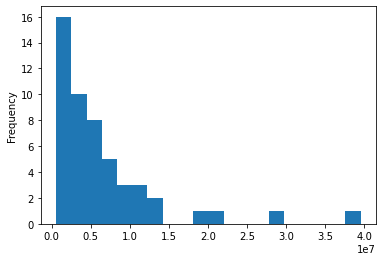

In [28]:
gdf_state['Total'].plot.hist(bins=20)

I plotted the 'Total' column for the dataset as a histogram using 20 bins. The plot shows how many rows, or states, have a total population within ranges presented on the x-axis. The histogram shows that most states have populations between 0 - 1.5e+07 while only 4 states have higher populations.

For the next few lines of code, I plot out the data for different races in the US using the code above.

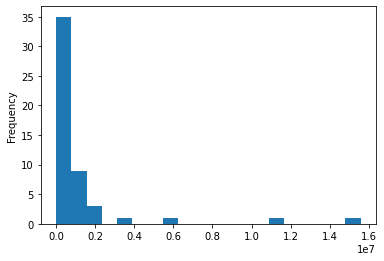

In [29]:
gdf_state['Hispanic'].plot.hist(bins=20)

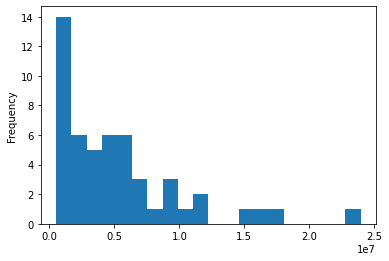

In [30]:
gdf_state['Non Hispanic'].plot.hist(bins=20)

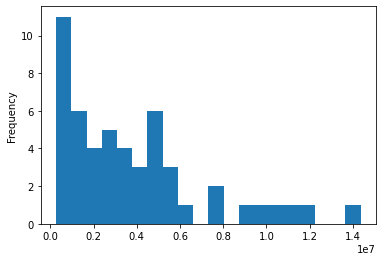

In [31]:
gdf_state['Non Hispanic White'].plot.hist(bins=20)

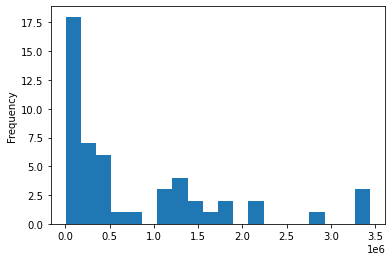

In [32]:
gdf_state['Non Hispanic Black'].plot.hist(bins=20)

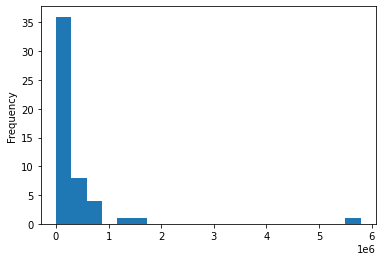

In [33]:
gdf_state['Non Hispanic Asian'].plot.hist(bins=20)

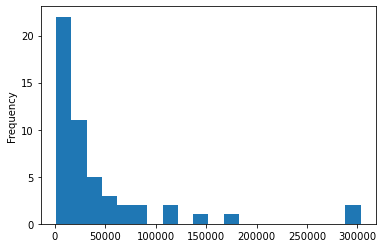

In [34]:
gdf_state['Non Hispanic American Indian and Alaska Native'].plot.hist(bins=20)

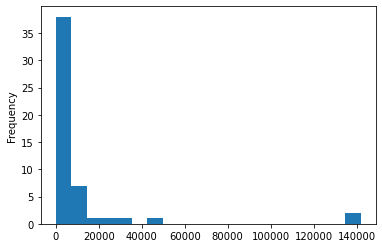

In [35]:
gdf_state['Non Hispanic Native Hawaiian and Other Pacific Islander'].plot.hist(bins=20)

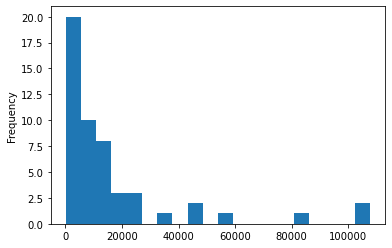

In [36]:
gdf_state['Non Hispanic Some other race'].plot.hist(bins=20)

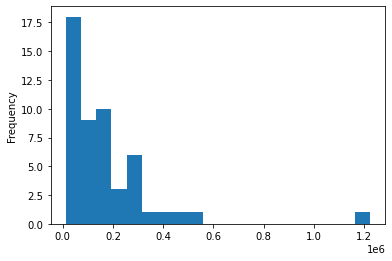

In [37]:
gdf_state['Non Hispanic Two or more races'].plot.hist(bins=20)

From the plots for each of the races present in the data, it was interesting to find that each plot showed similar trends to the plot for the 'Total' population.

## Sorting the data
In this section, I use the `sort_values` command to sort the states with top totals and `plot` command to plot out maps that visually show where certain races are more populated.

In [38]:
gdf_state_sorted = gdf_state.sort_values(by='Total',ascending = False)
gdf_state_sorted

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
44,04000US48,Texas,28995881.0,17471039.0,11929568.0,3442881.0,77748.0,1430236.0,21484.0,43532.0,525590.0,11524842.0,"MULTIPOLYGON (((-103.98018 32.00012, -103.9799..."
10,04000US12,Florida,21477737.0,15814108.0,11378457.0,3272904.0,42758.0,587358.0,13927.0,82214.0,436490.0,5663629.0,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
33,04000US36,New York,19453561.0,15704304.0,10710524.0,2763709.0,42268.0,1669362.0,3725.0,107705.0,407011.0,3749257.0,"MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ..."
39,04000US42,Pennsylvania,12801989.0,11804159.0,9680558.0,1374488.0,17150.0,450916.0,2595.0,19913.0,258539.0,997830.0,"MULTIPOLYGON (((-80.51935 41.84956, -80.51938 ..."
14,04000US17,Illinois,12671821.0,10455521.0,7690980.0,1759293.0,12938.0,710119.0,2897.0,22113.0,257181.0,2216300.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
36,04000US39,Ohio,11689100.0,11221511.0,9157673.0,1445171.0,16111.0,273219.0,4296.0,19236.0,305805.0,467589.0,"MULTIPOLYGON (((-84.80325 40.98939, -84.80324 ..."
11,04000US13,Georgia,10617423.0,9574781.0,5502156.0,3348754.0,19850.0,435875.0,5811.0,36739.0,225596.0,1042642.0,"MULTIPOLYGON (((-85.38658 33.90172, -85.38659 ..."
34,04000US37,North Carolina,10488084.0,9465089.0,6552128.0,2214270.0,113771.0,307366.0,5003.0,21879.0,250672.0,1022995.0,"MULTIPOLYGON (((-82.41674 36.07283, -82.41660 ..."
23,04000US26,Michigan,9986857.0,9460884.0,7457021.0,1350329.0,52365.0,325616.0,1900.0,10364.0,263289.0,525973.0,"MULTIPOLYGON (((-86.46412 45.32481, -86.46452 ..."


Used the `.sort_values()` command to sort all 51 rows from greatest to least populated according to values in the 'Total' column. 

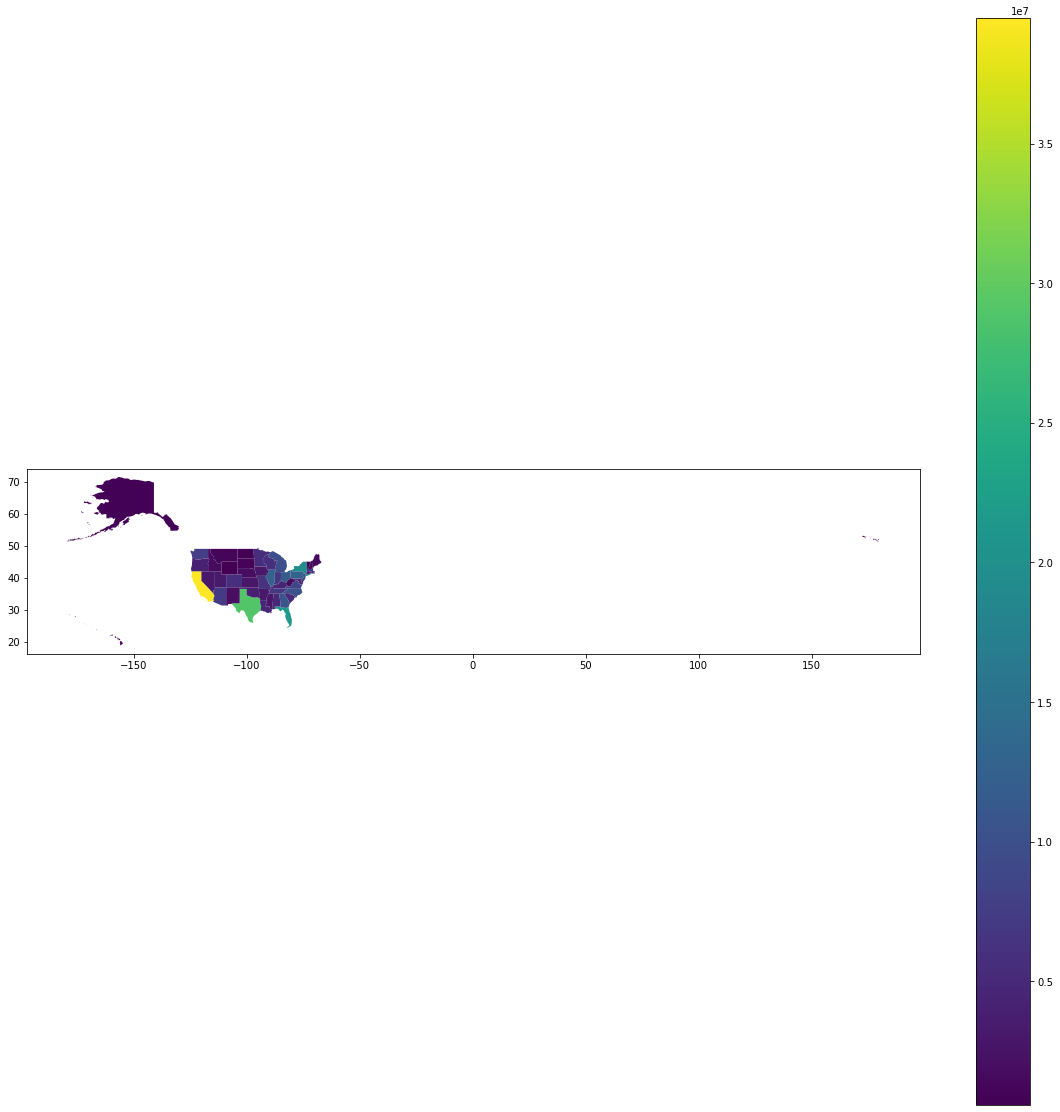

In [39]:
gdf_state_sorted.plot(figsize=(20,20),column='Total',legend=True)

Used the `plot()` function to create a map with a legend to show how populous, according to the values under the 'Total' column, states are in the US.

In [40]:
gdf_state_sorted2 = gdf_state.sort_values(by='Hispanic',ascending = False)
gdf_state_sorted2

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
44,04000US48,Texas,28995881.0,17471039.0,11929568.0,3442881.0,77748.0,1430236.0,21484.0,43532.0,525590.0,11524842.0,"MULTIPOLYGON (((-103.98018 32.00012, -103.9799..."
10,04000US12,Florida,21477737.0,15814108.0,11378457.0,3272904.0,42758.0,587358.0,13927.0,82214.0,436490.0,5663629.0,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
33,04000US36,New York,19453561.0,15704304.0,10710524.0,2763709.0,42268.0,1669362.0,3725.0,107705.0,407011.0,3749257.0,"MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ..."
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
14,04000US17,Illinois,12671821.0,10455521.0,7690980.0,1759293.0,12938.0,710119.0,2897.0,22113.0,257181.0,2216300.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
31,04000US34,New Jersey,8882190.0,7025345.0,4824866.0,1124643.0,9261.0,849020.0,2714.0,47706.0,167135.0,1856845.0,"MULTIPOLYGON (((-75.18960 40.59178, -75.18977 ..."
6,04000US08,Colorado,5758736.0,4501833.0,3888129.0,227812.0,31851.0,183793.0,6727.0,8905.0,154616.0,1256903.0,"MULTIPOLYGON (((-109.05095 40.22265, -109.0509..."
11,04000US13,Georgia,10617423.0,9574781.0,5502156.0,3348754.0,19850.0,435875.0,5811.0,36739.0,225596.0,1042642.0,"MULTIPOLYGON (((-85.38658 33.90172, -85.38659 ..."
32,04000US35,New Mexico,2096829.0,1063879.0,770678.0,39742.0,181772.0,33694.0,629.0,3788.0,33576.0,1032950.0,"MULTIPOLYGON (((-106.00632 36.99527, -106.0053..."


Used the `.sort_values()` command to sort all 51 rows from greatest to least populated according to values in the 'Hispanic' column. 

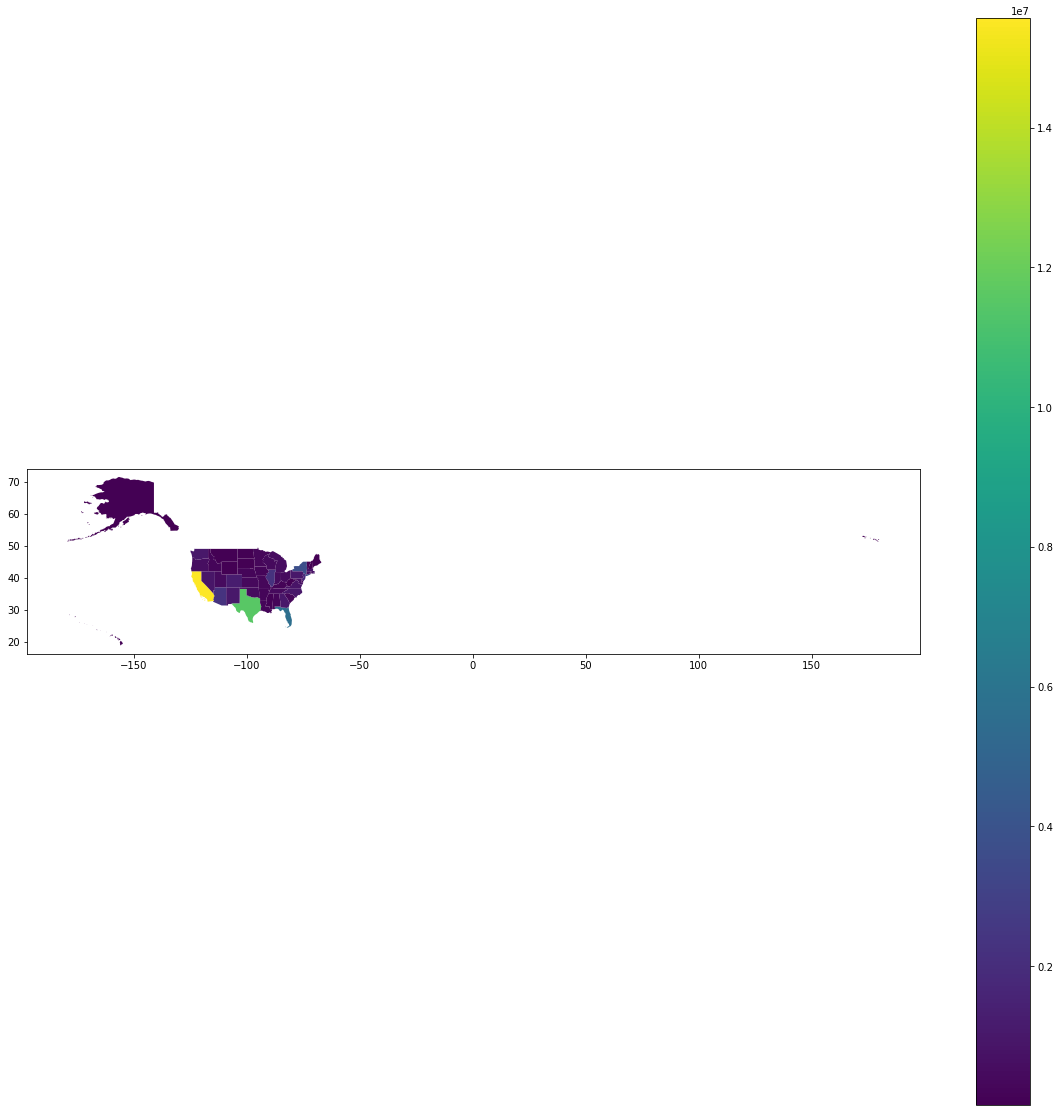

In [41]:
gdf_state_sorted2.plot(figsize=(20,20),column='Hispanic',legend=True)

Used the plot() function to create a map with a legend to show which states have greater or lesser populations of Hispanic people.

In [42]:
gdf_state_sorted3 = gdf_state.sort_values(by='Non Hispanic White',ascending = False)
gdf_state_sorted3

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
44,04000US48,Texas,28995881.0,17471039.0,11929568.0,3442881.0,77748.0,1430236.0,21484.0,43532.0,525590.0,11524842.0,"MULTIPOLYGON (((-103.98018 32.00012, -103.9799..."
10,04000US12,Florida,21477737.0,15814108.0,11378457.0,3272904.0,42758.0,587358.0,13927.0,82214.0,436490.0,5663629.0,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
33,04000US36,New York,19453561.0,15704304.0,10710524.0,2763709.0,42268.0,1669362.0,3725.0,107705.0,407011.0,3749257.0,"MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ..."
39,04000US42,Pennsylvania,12801989.0,11804159.0,9680558.0,1374488.0,17150.0,450916.0,2595.0,19913.0,258539.0,997830.0,"MULTIPOLYGON (((-80.51935 41.84956, -80.51938 ..."
36,04000US39,Ohio,11689100.0,11221511.0,9157673.0,1445171.0,16111.0,273219.0,4296.0,19236.0,305805.0,467589.0,"MULTIPOLYGON (((-84.80325 40.98939, -84.80324 ..."
14,04000US17,Illinois,12671821.0,10455521.0,7690980.0,1759293.0,12938.0,710119.0,2897.0,22113.0,257181.0,2216300.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
23,04000US26,Michigan,9986857.0,9460884.0,7457021.0,1350329.0,52365.0,325616.0,1900.0,10364.0,263289.0,525973.0,"MULTIPOLYGON (((-86.46412 45.32481, -86.46452 ..."
34,04000US37,North Carolina,10488084.0,9465089.0,6552128.0,2214270.0,113771.0,307366.0,5003.0,21879.0,250672.0,1022995.0,"MULTIPOLYGON (((-82.41674 36.07283, -82.41660 ..."
11,04000US13,Georgia,10617423.0,9574781.0,5502156.0,3348754.0,19850.0,435875.0,5811.0,36739.0,225596.0,1042642.0,"MULTIPOLYGON (((-85.38658 33.90172, -85.38659 ..."


Used the `.sort_values()` command to sort all 51 rows from greatest to least populated according to values in the 'Non Hispanic White' column. 

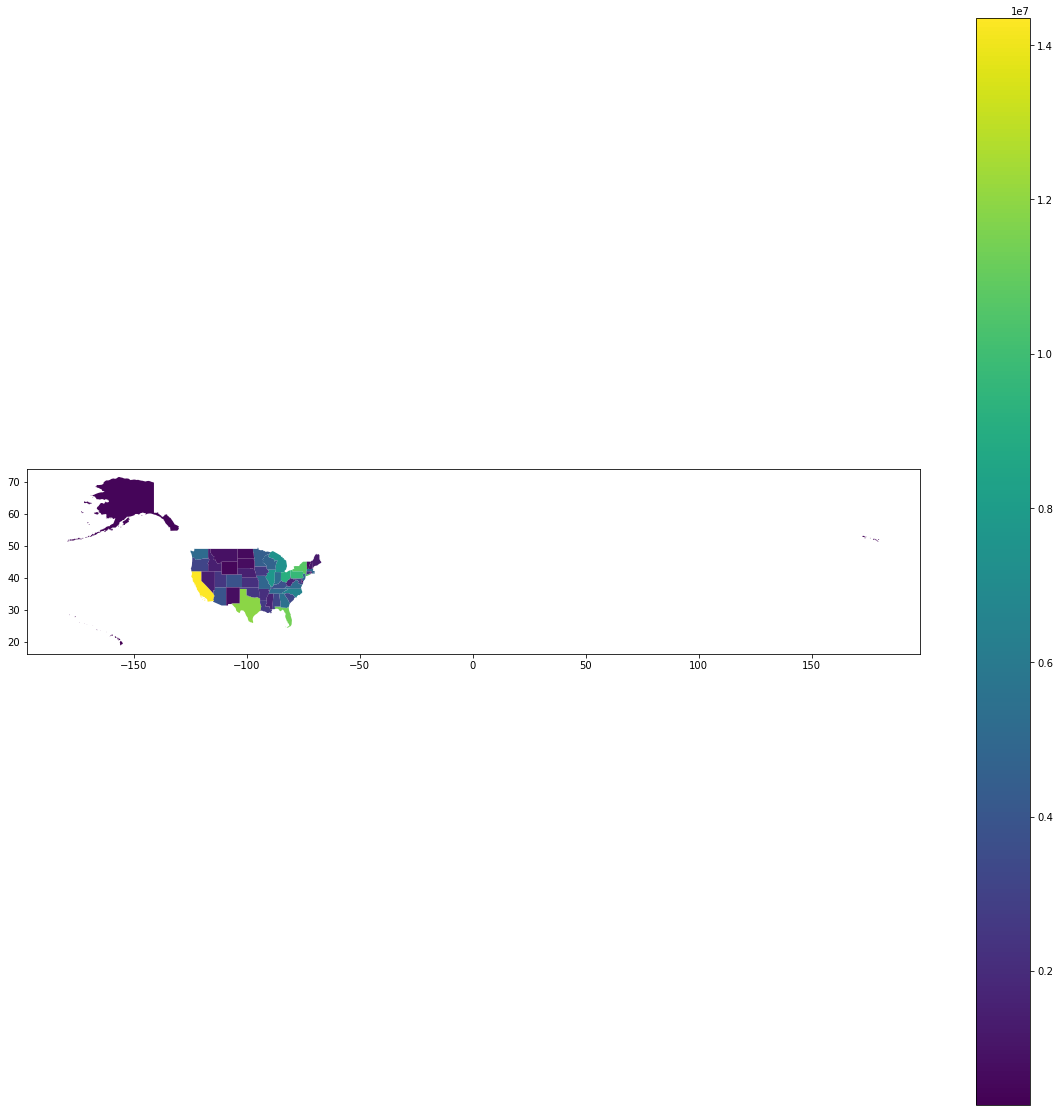

In [43]:
gdf_state_sorted3.plot(figsize=(20,20),column='Non Hispanic White',legend=True)

Used the plot() function to create a map with a legend to show which states have greater or lesser populations of Non Hispanic White people.

In [44]:
gdf_state_sorted4 = gdf_state.sort_values(by='Non Hispanic Asian',ascending = False)
gdf_state_sorted4

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
33,04000US36,New York,19453561.0,15704304.0,10710524.0,2763709.0,42268.0,1669362.0,3725.0,107705.0,407011.0,3749257.0,"MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ..."
44,04000US48,Texas,28995881.0,17471039.0,11929568.0,3442881.0,77748.0,1430236.0,21484.0,43532.0,525590.0,11524842.0,"MULTIPOLYGON (((-103.98018 32.00012, -103.9799..."
31,04000US34,New Jersey,8882190.0,7025345.0,4824866.0,1124643.0,9261.0,849020.0,2714.0,47706.0,167135.0,1856845.0,"MULTIPOLYGON (((-75.18960 40.59178, -75.18977 ..."
14,04000US17,Illinois,12671821.0,10455521.0,7690980.0,1759293.0,12938.0,710119.0,2897.0,22113.0,257181.0,2216300.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
48,04000US53,Washington,7614893.0,6623170.0,5126694.0,295239.0,86811.0,680421.0,48667.0,14188.0,371150.0,991723.0,"MULTIPOLYGON (((-123.24792 48.28456, -123.2475..."
10,04000US12,Florida,21477737.0,15814108.0,11378457.0,3272904.0,42758.0,587358.0,13927.0,82214.0,436490.0,5663629.0,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
47,04000US51,Virginia,8535519.0,7707365.0,5212705.0,1625942.0,17497.0,560030.0,4347.0,23329.0,263515.0,828154.0,"MULTIPOLYGON (((-77.32832 39.05768, -77.32830 ..."
12,04000US15,Hawaii,1415872.0,1265008.0,305020.0,25195.0,3133.0,539409.0,140656.0,3631.0,247964.0,150864.0,"MULTIPOLYGON (((-155.43286 20.14521, -155.4315..."
22,04000US25,Massachusetts,6892503.0,6038768.0,4846166.0,489592.0,13013.0,470127.0,2473.0,57348.0,160049.0,853735.0,"MULTIPOLYGON (((-71.49826 42.01727, -71.49907 ..."


Used the `.sort_values()` command to sort all 51 rows from greatest to least populated according to values in the 'Non Hispanic Asian' column. 

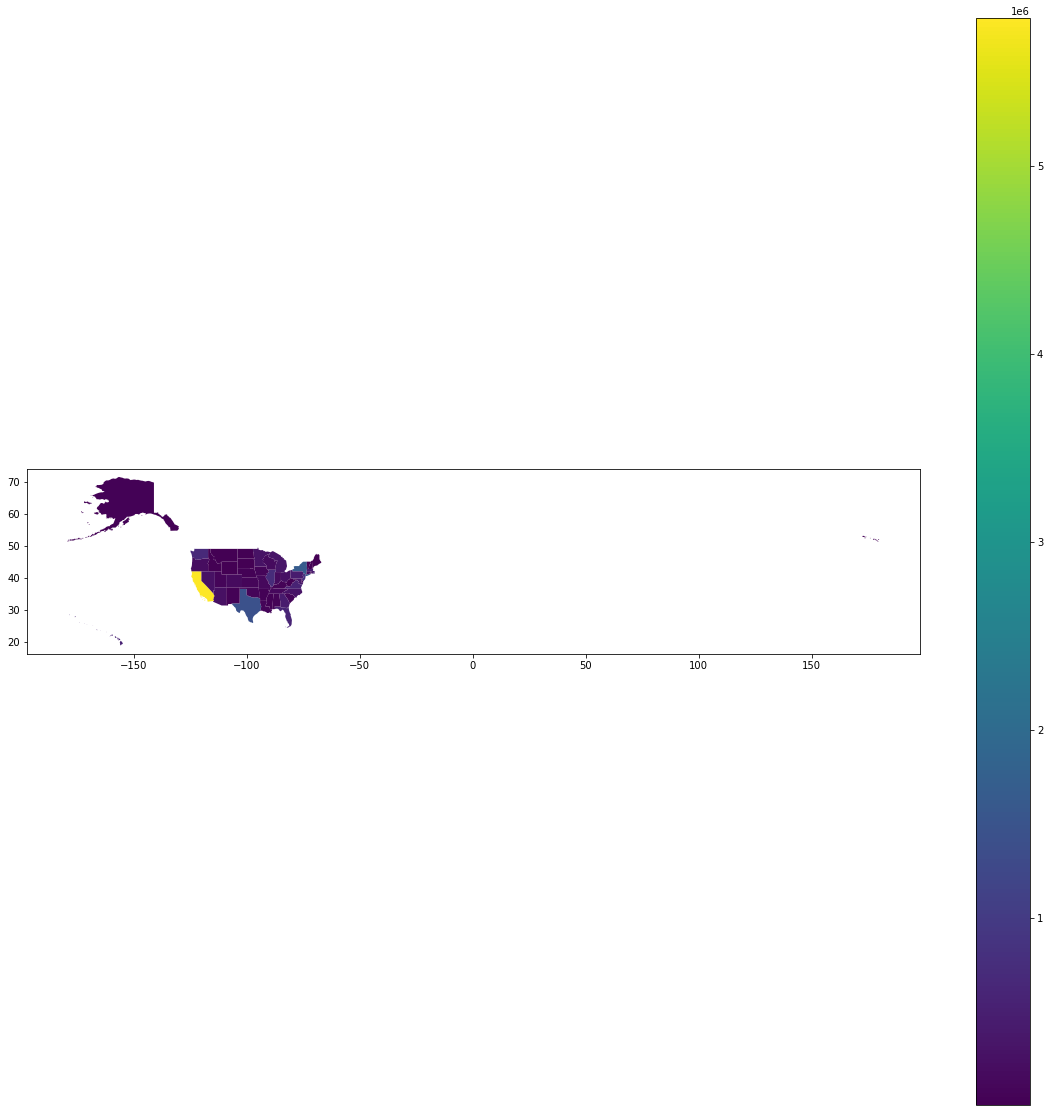

In [45]:
gdf_state_sorted4.plot(figsize=(20,20),column='Non Hispanic Asian',legend=True)

Used the plot() function to create a map with a legend to show which states have greater or lesser populations of Non Hispanic Asian people.

## Normalizing the Data

To better understand the data holistically, I normalized the data to provide race populations in each state as percentages of the total.

In [46]:
list(gdf_state)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

Used the `list()` command to view a list of the current columns in the dataset

In [47]:
gdf_state['Percent Non Hispanic'] = gdf_state['Non Hispanic']/gdf_state['Total']*100
gdf_state['Percent Hispanic'] = gdf_state['Hispanic']/gdf_state['Total']*100
gdf_state['Percent Non Hispanic White'] = gdf_state['Non Hispanic White']/gdf_state['Total']*100
gdf_state['Percent Non Hispanic Black'] = gdf_state['Non Hispanic Black']/gdf_state['Total']*100
gdf_state['Percent Non Hispanic American Indian and Alaska Native'] = gdf_state['Non Hispanic American Indian and Alaska Native']/gdf_state['Total']*100
gdf_state['Percent Non Hispanic Asian'] = gdf_state['Non Hispanic Asian']/gdf_state['Total']*100
gdf_state['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf_state['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdf_state['Total']*100
gdf_state['Percent Non Hispanic Some other race'] = gdf_state['Non Hispanic Some other race']/gdf_state['Total']*100
gdf_state['Percent Non Hispanic Two or more races'] = gdf_state['Non Hispanic Two or more races']/gdf_state['Total']*100

I created new columns, and populate each with normalized data from each race column to get the percent of the total value. Now the data set will include 9 new columns containing the calulated normalized data

In [48]:
gdf_state.sample(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
12,04000US15,Hawaii,1415872.0,1265008.0,305020.0,25195.0,3133.0,539409.0,140656.0,3631.0,247964.0,150864.0,"MULTIPOLYGON (((-155.43286 20.14521, -155.4315...",89.344800,10.655200,21.542908,1.779469,0.221277,38.097300,9.934231,0.256450,17.513165
5,04000US06,California,39512223.0,23937341.0,14356081.0,2171989.0,149063.0,5786711.0,141846.0,107538.0,1224113.0,15574882.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378...",60.582117,39.417883,36.333266,5.497005,0.377258,14.645369,0.358993,0.272164,3.098062
19,04000US22,Louisiana,4648794.0,4398591.0,2707712.0,1494358.0,24272.0,81016.0,938.0,11477.0,78818.0,250203.0,"MULTIPOLYGON (((-92.06910 33.00816, -92.06904 ...",94.617894,5.382106,58.245472,32.145068,0.522114,1.742732,0.020177,0.246881,1.695450
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,172033.0,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169...",68.255504,31.744496,53.982220,4.383259,3.972692,3.231366,0.183563,0.138898,2.363507
48,04000US53,Washington,7614893.0,6623170.0,5126694.0,295239.0,86811.0,680421.0,48667.0,14188.0,371150.0,991723.0,"MULTIPOLYGON (((-123.24792 48.28456, -123.2475...",86.976534,13.023466,67.324570,3.877126,1.140016,8.935398,0.639103,0.186319,4.874002


Took five random samples from the dataset to check if I correctly added the new normalized columns

## Creating More Maps
With the normalized data, I can now better compare populations between states/census tracts.

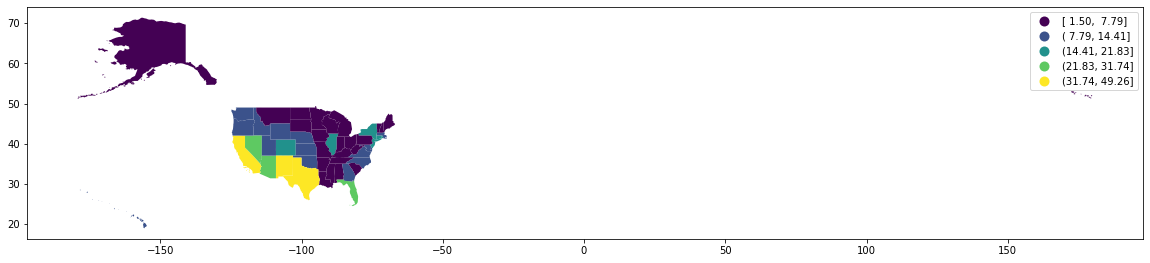

In [49]:
gdf_state.plot(figsize=(20,20),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='NaturalBreaks')

Here I plotted a map of the percent hispanic population in the US using a 'natural breaks' scheme range

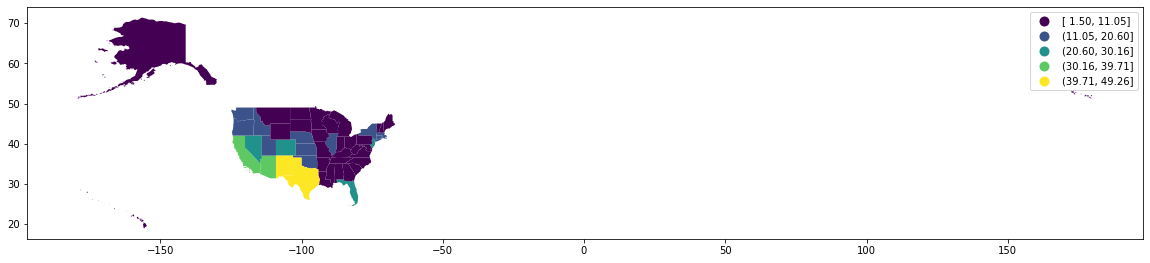

In [50]:
gdf_state.plot(figsize=(20,20),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='EqualInterval')

Here I plotted a map of the percent hispanic population in the US using a 'equal interval' scheme range

Text(0.5, 1.0, 'Percent Non Hispanic White')

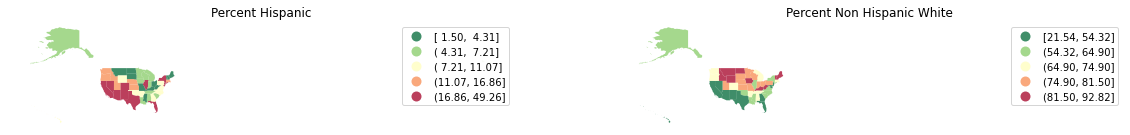

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
# create the 2 subplots, both on the same row

ax1, ax2 = axs
# name each subplot


gdf_state.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
         # assigns this map to the first subplot
            legend=True
           )
# plotting a map for 'Percent Hispanic' column
ax1.axis("off")
ax1.set_title("Percent Hispanic")


gdf_state.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
         # assigns this map to the second subplot
            legend=True
           )
# plotting a map for 'Percent Non Hispanic White' column
ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

Above I plotted both a map for 'Percent Hispanic' and 'Percent Non Hispanic White' on a subplot to compare the drastic difference in population between both races.

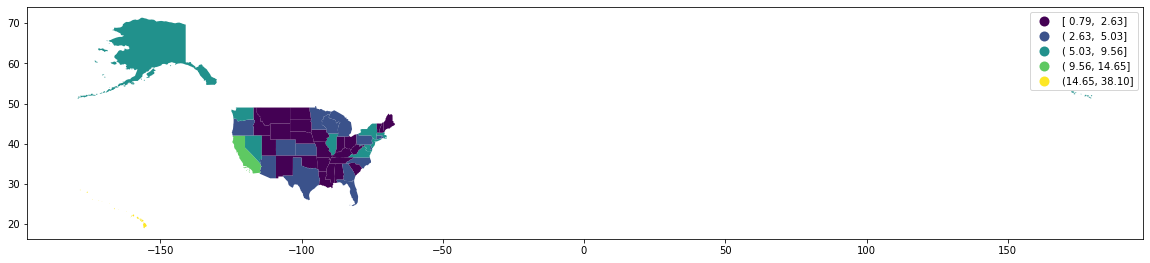

In [52]:
gdf_state.plot(figsize=(20,20),
                 column='Percent Non Hispanic Asian',
                 legend=True, 
                 scheme='NaturalBreaks')

Above I experimented with the data to plot a map showing the percent non hispanic asian population in the United States

Text(0.5, 1.0, 'Percent Non Hispanic Some other race')

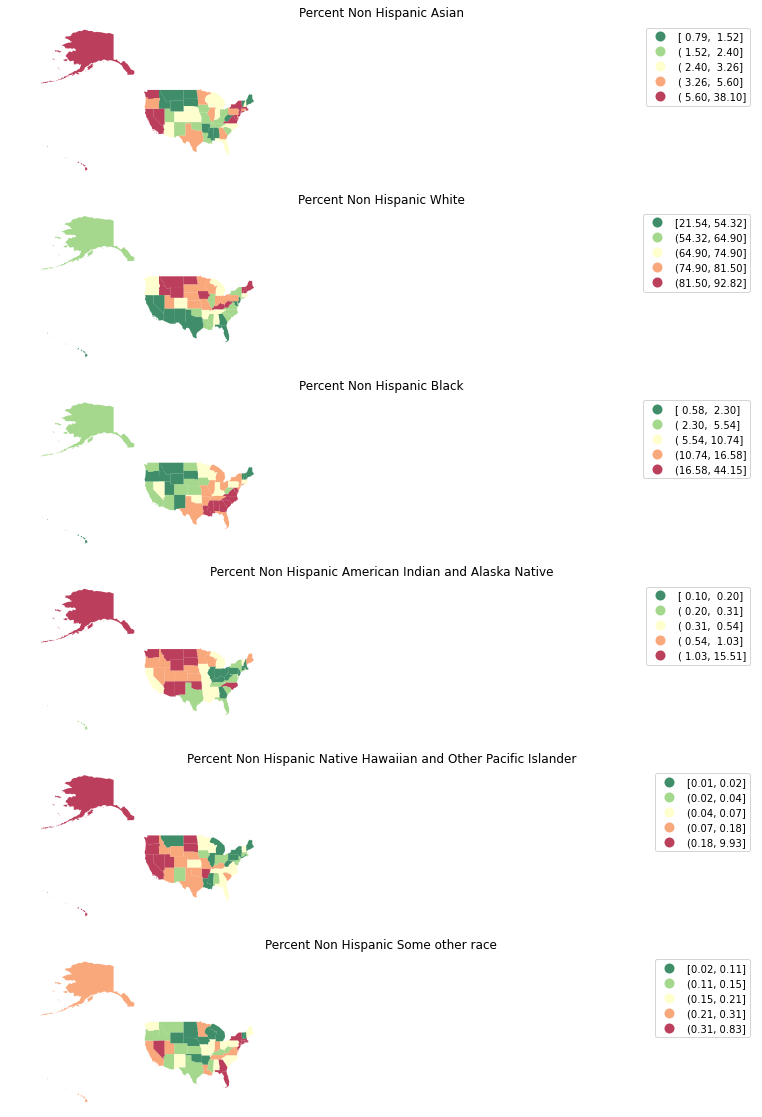

In [53]:
fig, axs = plt.subplots(6, 1, figsize=(20, 20))
# create the 2 subplots, both on two different rows

ax1, ax2, ax3, ax4, ax5, ax6 = axs
# name each subplot


gdf_state.plot(column='Percent Non Hispanic Asian', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
         # assigns this map to the first subplot
            legend=True
           )
# plotting a map for 'Percent Non Hispanic Asian' column
ax1.axis("off")
ax1.set_title("Percent Non Hispanic Asian")


gdf_state.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
         # assigns this map to the second subplot
            legend=True
           )
# plotting a map for 'Percent Non Hispanic White' column
ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

gdf_state.plot(column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax3, 
         # assigns this map to the second subplot
            legend=True
           )
# plotting a map for 'Percent Non Hispanic Black' column
ax3.axis("off")
ax3.set_title("Percent Non Hispanic Black")

gdf_state.plot(column='Percent Non Hispanic American Indian and Alaska Native', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax4, 
         # assigns this map to the second subplot
            legend=True
           )
# plotting a map for 'Percent Non Hispanic American Indian and Alaska Native' column
ax4.axis("off")
ax4.set_title("Percent Non Hispanic American Indian and Alaska Native")

gdf_state.plot(column='Percent Non Hispanic Native Hawaiian and Other Pacific Islander', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax5, 
         # assigns this map to the second subplot
            legend=True
           )
# plotting a map for 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander' column
ax5.axis("off")
ax5.set_title("Percent Non Hispanic Native Hawaiian and Other Pacific Islander")

gdf_state.plot(column='Percent Non Hispanic Some other race', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax6, 
         # assigns this map to the second subplot
            legend=True
           )
# plotting a map for 'Percent Non Hispanic Some other race' column
ax6.axis("off")
ax6.set_title("Percent Non Hispanic Some other race")

Above I plotted both 6 maps for six different races on a subplot to compare the drastic difference between race populations in the United States.